# Data Analyst job dataset
This dataset was created by picklesueat and contains more than 2000 job listing for data analyst positions.
we will try to:
* Find the best jobs by salary and company rating
* Explore skills required in job descriptions

In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading csv file using pandas
df = pd.read_csv('DataAnalyst.csv')
sns.set_style('whitegrid')

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

We will separate out the salary and calculate the mean salary because we can't use range values

In [5]:
df1 = df.copy()
df1=df1.drop('Job Description',axis=1)

In [6]:
def fun(x):
    y = str(x).split(' ')[0].split('-')
    k = 0
    l = 0
    try:
        for i in y:
            j = int(i.strip('$,K'))
            k = k+j
            l +=1
        return k/2
    except:
        return l


In [7]:
#creating a new column with the mean values from 'Salary Estimate column'
df1['salary_est'] = df1['Salary Estimate'].apply(fun)

In [8]:
df1.tail()

,Unnamed: 0,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,salary_est
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,91.0
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1,91.0
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1,91.0
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1,91.0
2252,2252,Senior Quality Data Analyst,$78K-$104K (Glassdoor est.),3.4,SCL Health\n3.4,"Broomfield, CO","Broomfield, CO",10000+ employees,1864,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Centura Health, HealthONE, Denver Health and H...",-1,91.0


In [9]:
df1 =df1.drop('Salary Estimate',axis= 1,)


In [10]:
df1.head()

,Unnamed: 0,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,salary_est
0,0,"Data Analyst, Center on Immigration and Justic...",3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,51.5
1,1,Quality Data Analyst,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,51.5
2,2,"Senior Data Analyst, Insights & Analytics Team...",3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,51.5
3,3,Data Analyst,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,51.5
4,4,Reporting Data Analyst,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,51.5


In [11]:
df1['Type of ownership'].nunique()

15

In [12]:
bins=[0,1.99,2.99,3.99,4.99,5]
label= ['1star','2star','3star','4star','5star']
df1['rating_cat'] = pd.cut(df1.Rating,bins=bins,labels=label)

In [13]:
df1.rating_cat.fillna('3star',inplace=True)

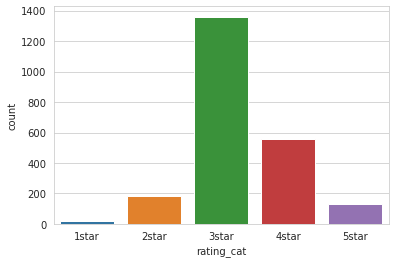

In [14]:
sns.countplot(data=df1,x='rating_cat')

We can see most of the company has 3star rating on average

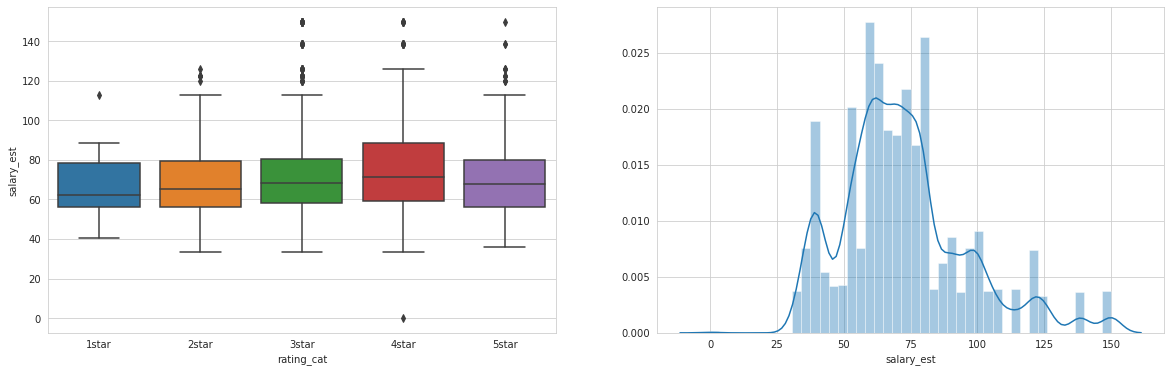

In [15]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(x='rating_cat',y='salary_est',data=df1)
plt.subplot(1,2,2)
sns.distplot(df1.salary_est)

Company with rating 4star pays bigger amount of salary comparing to others. and we see most of the data analyst's salary is in range of around 50 to 80 us dollar

In [16]:
df1[df1['rating_cat']=='4star'].head()

,Unnamed: 0,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,salary_est,rating_cat
3,3,Data Analyst,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,51.5,4star
6,6,Business/Data Analyst (FP&A),4.4,Two Sigma\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,51.5,4star
8,8,Data Analyst,4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",-1,51.5,4star
9,9,"Data Analyst, Merchant Health",4.4,Riskified\n4.4,"New York, NY","New York, NY",501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,"Signifyd, Forter",-1,51.5,4star
10,10,Data Analyst,4.0,NYU Langone Health\n4.0,"New York, NY","New York, NY",10000+ employees,1841,Hospital,Health Care Services & Hospitals,Health Care,$5 to $10 billion (USD),"NewYork-Presbyterian Hospital, Northwell Health",-1,51.5,4star


Here is a list of best jobs by salary and rating

In [17]:
df1.Size.nunique()

9

In [18]:
df2 = df1.copy()
df2.replace(['Unknown / Non-Applicable','-1'],np.NaN,inplace=True)

In [19]:
df2.Revenue.unique()

array(['$100 to $500 million (USD)', '$2 to $5 billion (USD)', nan,
       '$50 to $100 million (USD)', '$1 to $2 billion (USD)',
       '$5 to $10 billion (USD)', '$1 to $5 million (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       'Less than $1 million (USD)', '$10 to $25 million (USD)',
       '$500 million to $1 billion (USD)', '$5 to $10 million (USD)'],
      dtype=object)

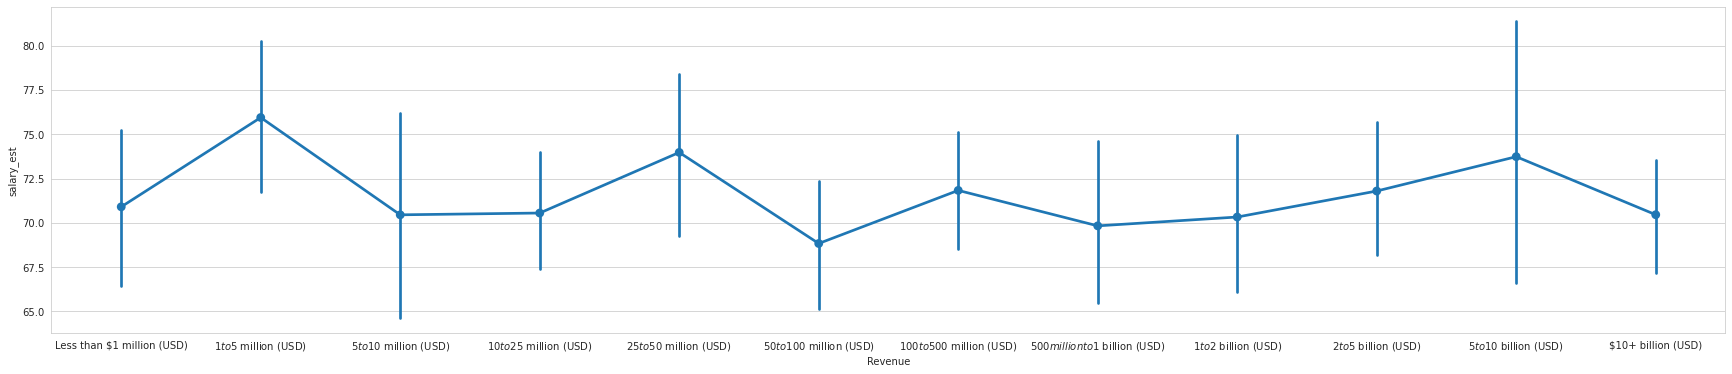

In [20]:
plt.figure(figsize=(30,6))
sns.pointplot(x='Revenue',y='salary_est',data=df2,order=['Less than $1 million (USD)', '$1 to $5 million (USD)', '$5 to $10 million (USD)', '$10 to $25 million (USD)','$25 to $50 million (USD)','$50 to $100 million (USD)','$100 to $500 million (USD)','$500 million to $1 billion (USD)', '$1 to $2 billion (USD)','$2 to $5 billion (USD)','$5 to $10 billion (USD)','$10+ billion (USD)'])

From above, we can say revenue doesn't effect much on salary

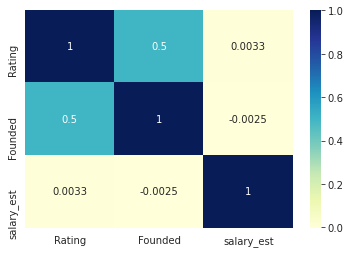

In [21]:
corr = df1[['Rating','Founded','salary_est']]
sns.heatmap(corr.corr(),annot=True,cmap='YlGnBu')

In [22]:
df3 = df1.copy()
df3.Founded.replace(-1,np.NaN,inplace=True)

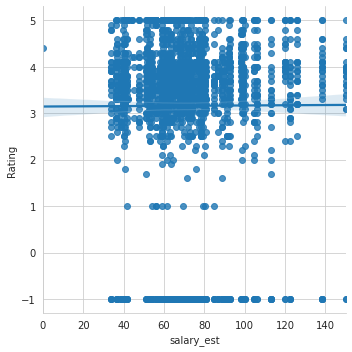

In [23]:
sns.lmplot(x='salary_est',y='Rating',data=df3)

In [24]:

df1.Size.replace(['Unknown','-1'],np.NaN,inplace=True)
df1.Size.unique()

array(['201 to 500 employees', '10000+ employees',
       '1001 to 5000 employees', '501 to 1000 employees',
       '5001 to 10000 employees', '1 to 50 employees',
       '51 to 200 employees', nan], dtype=object)

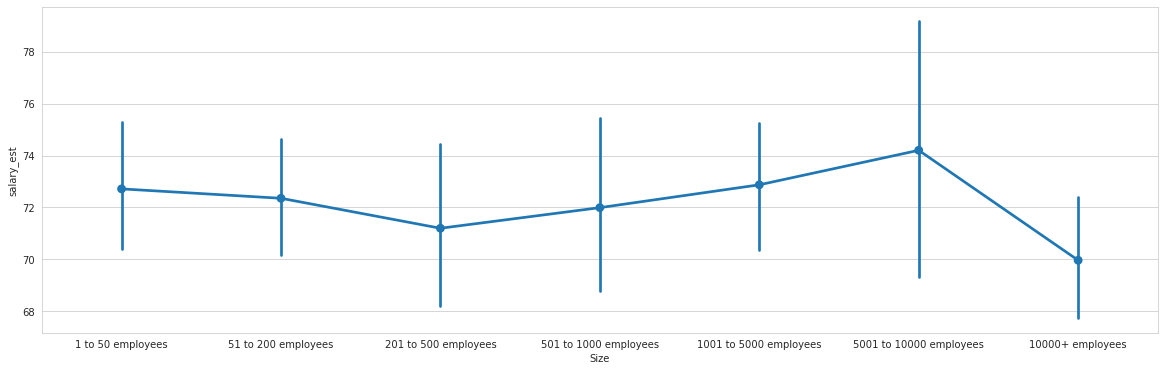

In [25]:
plt.figure(figsize=(20,6))
sns.pointplot(x='Size',y='salary_est',data=df2,order=[ '1 to 50 employees','51 to 200 employees','201 to 500 employees', '501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees'])

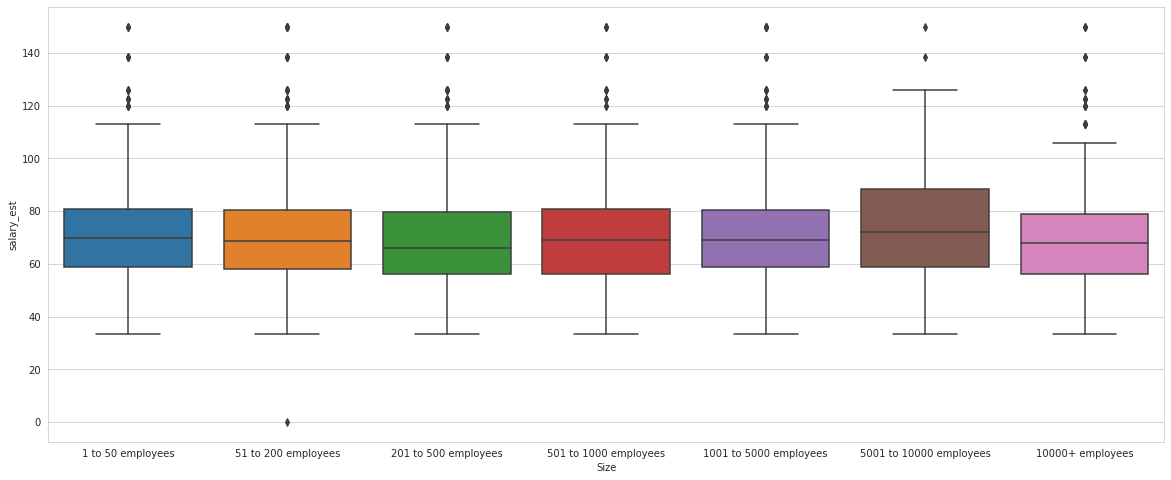

In [26]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Size',y='salary_est',data=df2,order=[ '1 to 50 employees','51 to 200 employees','201 to 500 employees', '501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees'])

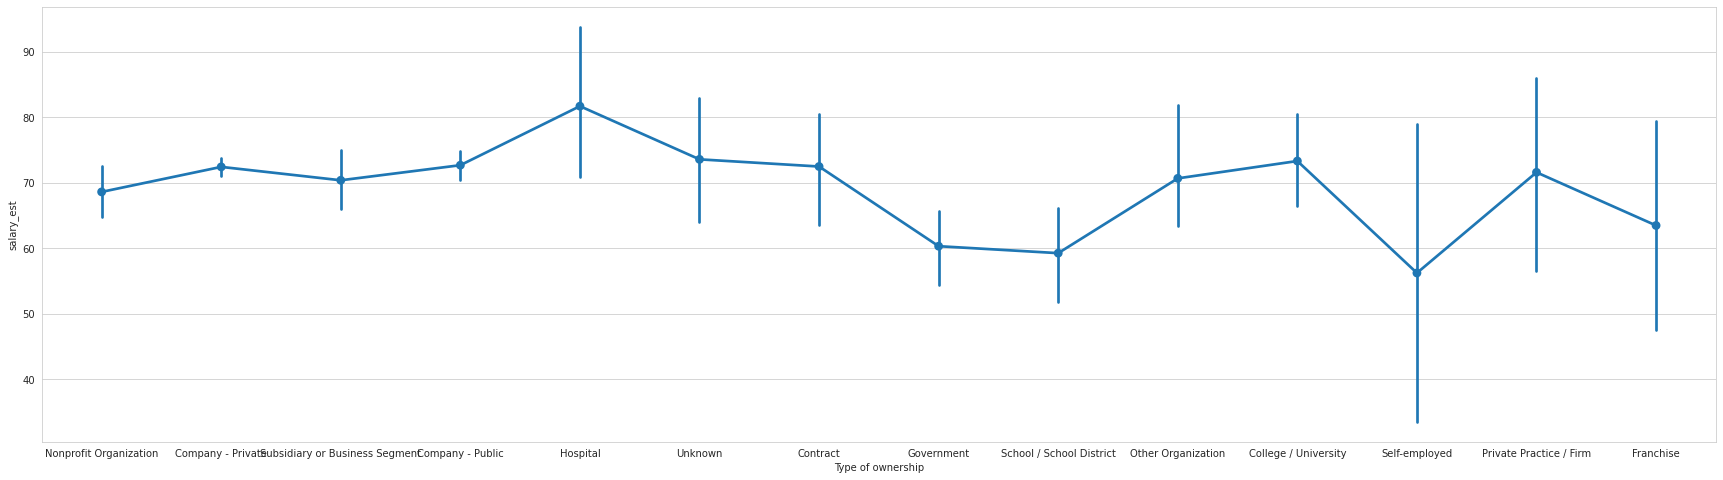

In [27]:
plt.figure(figsize=(30,8))
sns.pointplot(x='Type of ownership',y='salary_est',data=df2)

data analyst job in hospital pays biggest amount of salary and self employed pays lowest amount of salary according to the dataset